# Li-Daie-2016 - A DataJoint example
The data and results presented in this notebook pertain to the paper:

>Nuo Li, Kayvon Daie, Karel Svoboda & Shaul Druckmann. "Robust neuronal dynamics in premotor cortex during motor planning" (2016) Nature (https://dx.doi.org/10.1038/nature17643)

This notebook provide demonstrations of working with a DataJoint data pipeline in querying data, apply data conditioning and reproduce some key figures in the paper. The orignal data , in NWB 2.0 format, had been ingested into a DataJoint data pipeline (data pipeline schema is given below). As a validation of complete ingestion of the original data into DataJoint, figures 1e, 2c, and extended figure 2 will be reproduced in this example.

In [1]:
%matplotlib inline
import os
os.chdir('..')

In [2]:
import datajoint as dj
dj.conn().connect()

Connecting root@127.0.0.1:3306


In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import signal

from pipeline import lab, experiment, ephys, psth
from pipeline.plot import unit_characteristic_plot, unit_psth

In [4]:
import warnings
warnings.filterwarnings('ignore')

##  Firing rate change from control induced by photoinhibition for different task periods - Figure 1e

#### We first select a set of sample neurons
#### Using the built-in `plot_unit_psth`, plots of spike-raster and unit PSTH can be produced based on the selected units

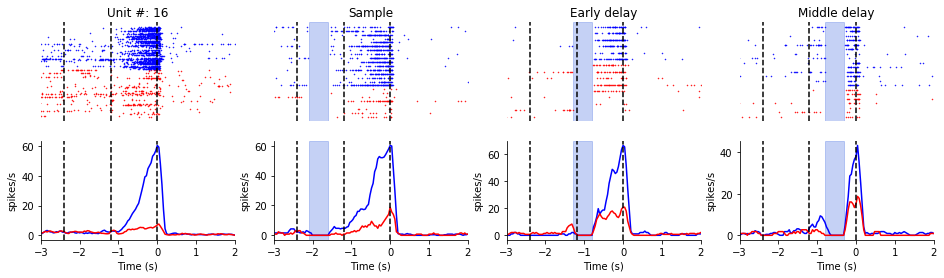

In [6]:
unit =  (ephys.Unit & {'subject_id': 255201, 'session': 6, 'unit': 16}).fetch1('KEY')
fig, axes = plt.subplots(2, 4, figsize=(16,4))
for axs, kw, title in zip(axes.T, (['good_noearlylick_', '_hit'], ['left_alm', 'sample'],
                          ['left_alm', 'early_delay'], ['left_alm', 'middle_delay']), 
                         ('', 'Sample', 'Early delay', 'Middle delay')):
    unit_psth.plot_unit_psth(unit, condition_name_kw=kw, axs=axs)
    if title:
        axs[0].set_title(title)

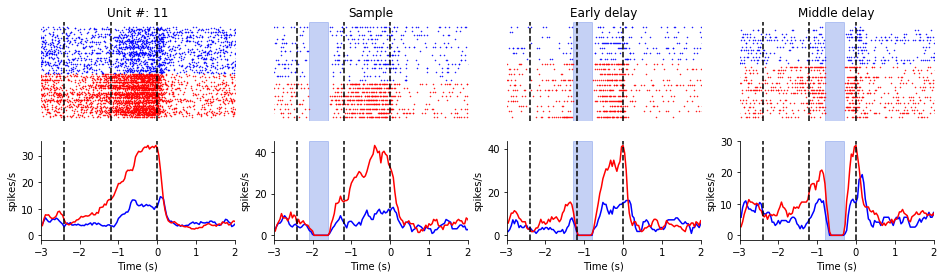

In [7]:
unit =  (ephys.Unit & {'subject_id': 255201, 'session': 5, 'unit': 11}).fetch1('KEY')
fig, axes = plt.subplots(2, 4, figsize=(16,4))
for axs, kw, title in zip(axes.T, (['good_noearlylick_', '_hit'], ['left_alm', 'sample'],
                          ['left_alm', 'early_delay'], ['left_alm', 'middle_delay']), 
                         ('', 'Sample', 'Early delay', 'Middle delay')):
    unit_psth.plot_unit_psth(unit, condition_name_kw=kw, axs=axs)
    if title:
        axs[0].set_title(title)

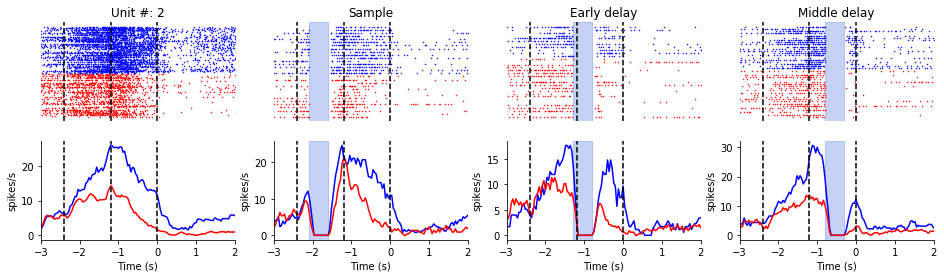

In [8]:
unit =  (ephys.Unit & {'subject_id': 255201, 'session': 5, 'unit': 2}).fetch1('KEY')
fig, axes = plt.subplots(2, 4, figsize=(16,4))
for axs, kw, title in zip(axes.T, (['good_noearlylick_', '_hit'], ['left_alm', 'sample'],
                          ['left_alm', 'early_delay'], ['left_alm', 'middle_delay']), 
                         ('', 'Sample', 'Early delay', 'Middle delay')):
    unit_psth.plot_unit_psth(unit, condition_name_kw=kw, axs=axs)
    if title:
        axs[0].set_title(title)

### Plot more sample units 
#### Selecting units under left-ALM photostim effect in `Sample`, `Early delay` and `Middle delay`
#### And a random subset of these units are selected for plotting

In [17]:
unit_keys = (units & experiment.PhotostimEvent).fetch('KEY')

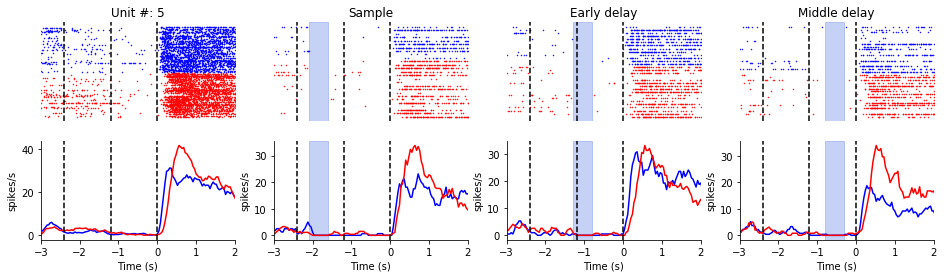

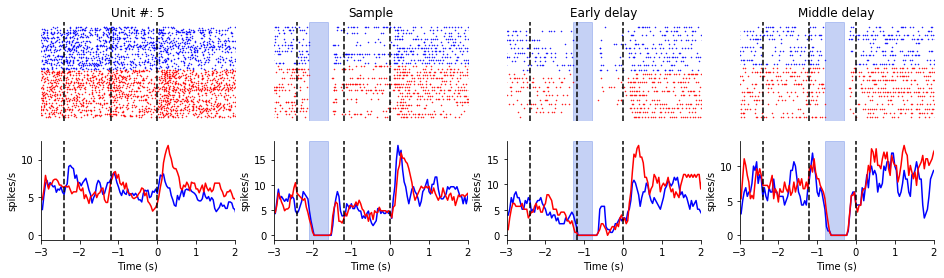

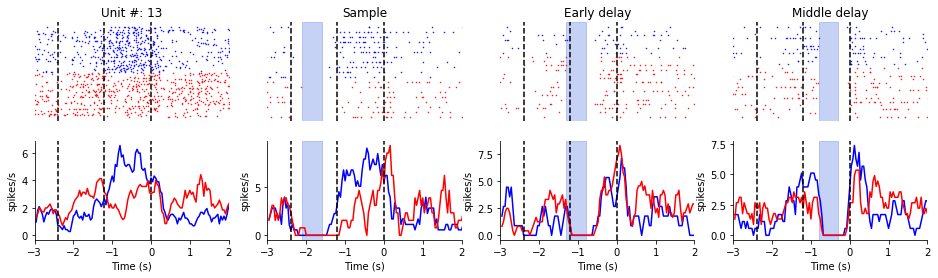

In [18]:
for unit in [unit_keys[k] for k in np.random.randint(len(unit_keys), size=(3,))]:
    fig, axes = plt.subplots(2, 4, figsize=(16,4))
    for axs, kw, title in zip(axes.T, (['good_noearlylick_', '_hit'], ['left_alm', 'sample'],
                              ['left_alm', 'early_delay'], ['left_alm', 'middle_delay']), 
                             ('', 'Sample', 'Early delay', 'Middle delay')):
        unit_psth.plot_unit_psth(unit, condition_name_kw=kw, axs=axs)
        if title:
            axs[0].set_title(title)

## Firing rate change from control induced by left-right-bilateral photoinhibition - Figure 2c 
#### Under ALM photostim effect in `Early delay` at `Ipsilateral`, `Contralateral` and `Bilateral`

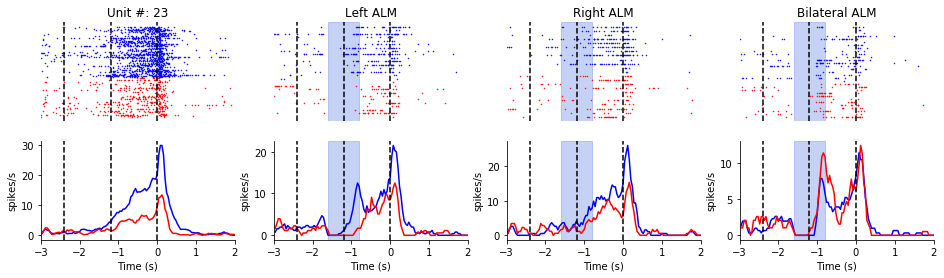

In [11]:
unit = (ephys.Unit & {'subject_id': 258250, 'session': 1, 'unit': 23}).fetch1('KEY')
fig, axes = plt.subplots(2, 4, figsize=(16,4))
for axs, kw, title in zip(axes.T, (['good_noearlylick_', '_hit'], ['left_alm', 'early_delay'],
                          ['right_alm', 'early_delay'], ['both_alm', 'early_delay']), 
                         ('', 'Left ALM', 'Right ALM', 'Bilateral ALM')):
    unit_psth.plot_unit_psth(unit, condition_name_kw=kw, axs=axs)
    if title:
        axs[0].set_title(title)

### Plot more sample units 
#### First, find the units from sessions that underwent photostim at `left`, `right`, and `bilateral` ALM
#### And a random subset of these units are selected for plotting

In [19]:
left_alm_stim_units = units.proj() & (experiment.Photostim * experiment.BrainLocation & 'brain_location_name = "left_alm"')
right_alm_stim_units = units.proj() & (experiment.Photostim * experiment.BrainLocation & 'brain_location_name = "right_alm"')
both_alm_stim_units = units.proj() & (experiment.Photostim * experiment.BrainLocation & 'brain_location_name = "both_alm"')

In [20]:
unit_keys = (left_alm_stim_units * right_alm_stim_units * both_alm_stim_units).fetch('KEY')

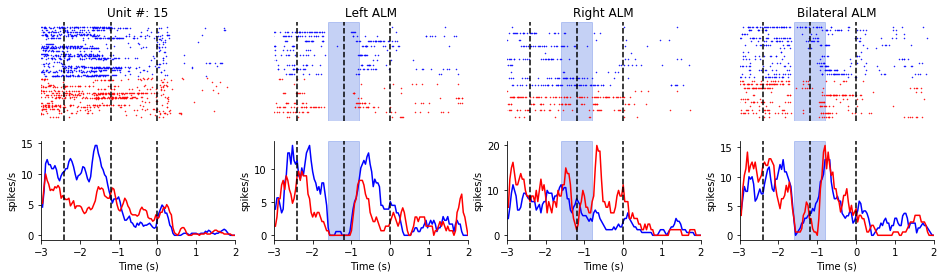

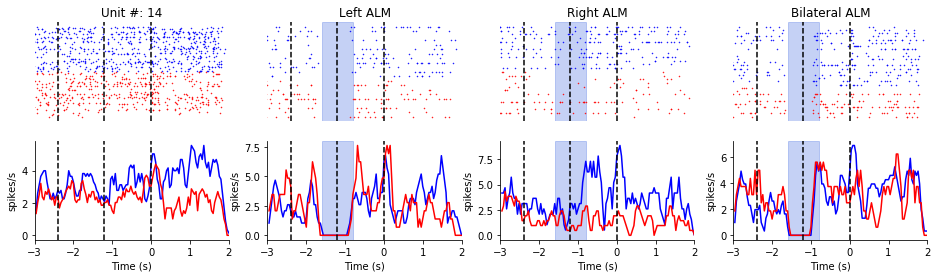

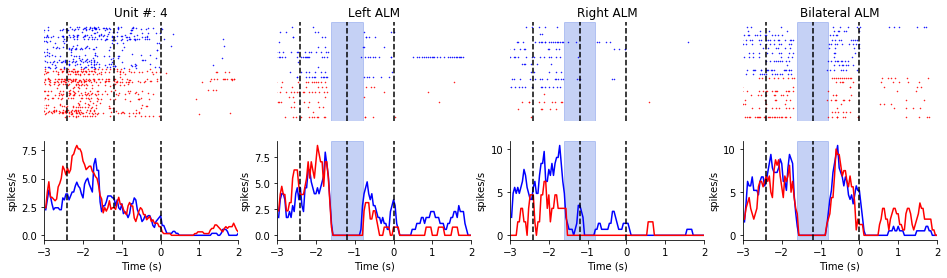

In [22]:
for unit in [unit_keys[k] for k in np.random.randint(len(unit_keys), size=(3,))]:
    fig, axes = plt.subplots(2, 4, figsize=(16,4))
    for axs, kw, title in zip(axes.T, (['good_noearlylick_', '_hit'], ['left_alm', 'early_delay'],
                              ['right_alm', 'early_delay'], ['both_alm', 'early_delay']), 
                             ('', 'Left ALM', 'Right ALM', 'Bilateral ALM')):
        unit_psth.plot_unit_psth(unit, condition_name_kw=kw, axs=axs)
        if title:
            axs[0].set_title(title)

# Plot population PSTH - with selectivity - Extended Data Figure 1b
Here, we select units from the selected subjects that are from left ALM

The units are sorted based on the center of gravity of the differences in PSTH between left/right trials for plotting

In [24]:
units = units & (ephys.ProbeInsertion.InsertionLocation
                       * experiment.BrainLocation  & {'brain_area': 'ALM', 'hemisphere': 'left'})

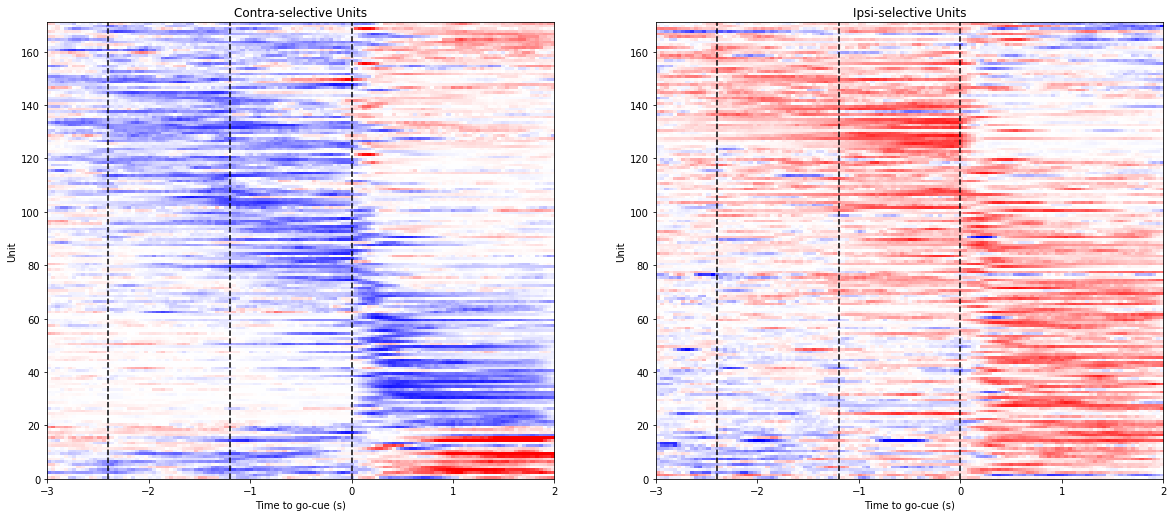

In [28]:
unit_characteristic_plot.plot_stacked_contra_ipsi_psth(units)

# =====================================================

In [27]:
import importlib
importlib.reload(unit_characteristic_plot)
importlib.reload(unit_psth)

<module 'pipeline.plot.unit_psth' from 'C:\\Users\\thinh\\Documents\\TN-Vathes\\NWB_Janelia\\Li-2015a\\pipeline\\plot\\unit_psth.py'>